In [19]:
import numpy as np 
import matplotlib.pyplot as plt 
from calculator import Methods,Calculator
from const import Const
from test1 import Test

In [20]:
cal=Calculator()
cal.read_excel('Data2.xlsx')
te=Test()

In [24]:
filename='store-all.csv'
f=open(filename,'r')
values=[]
for line in f:
    values.append(line.split(','))
g_in=float(values[1][-3])
f.close()

filename='store-8e+6.csv'
f=open(filename,'r')
values=[]
for line in f:
    values.append(line.split(','))
f.close()

In [23]:
values[1]

['0', '4.999999972', '-0.000242384', '0.156083864', '', '\n']

In [5]:
import matplotlib.pyplot as plt

0 is done.
1 is done.
2 is done.
3 is done.
4 is done.
5 is done.
6 is done.
7 is done.
8 is done.
9 is done.
10 is done.
11 is done.
12 is done.
13 is done.
14 is done.
15 is done.
16 is done.
17 is done.
18 is done.
19 is done.
20 is done.
21 is done.
22 is done.
23 is done.
24 is done.
25 is done.
26 is done.
27 is done.
28 is done.
29 is done.
30 is done.
31 is done.
32 is done.
33 is done.
34 is done.
35 is done.
36 is done.
37 is done.
38 is done.
39 is done.
40 is done.
41 is done.
42 is done.
43 is done.
44 is done.
45 is done.
46 is done.
47 is done.
48 is done.
49 is done.
50 is done.
51 is done.
52 is done.
53 is done.
54 is done.
55 is done.
56 is done.
57 is done.
58 is done.
59 is done.
60 is done.
61 is done.
62 is done.
63 is done.
64 is done.
65 is done.
66 is done.
67 is done.
68 is done.
69 is done.
70 is done.
71 is done.
72 is done.
73 is done.
74 is done.
75 is done.
76 is done.
77 is done.
78 is done.
79 is done.
80 is done.
81 is done.
82 is done.
83 is done.
84

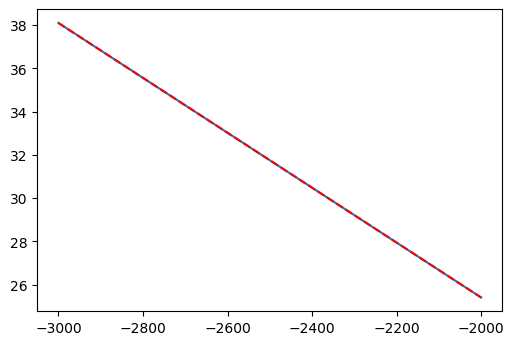

In [28]:
order=45
m=cal.M_p[order]
L_s=cal.L_init[order]
ST=float(values[order+1][-1])
te.con.set_M_p(m,8e+6)
x=np.linspace(-3.0e+3,-2.0e+3,100)
y=np.ones(100)
for i in range(len(y)):
    y[i]=te.cal_ML_simple_B(ST,L_s,True,0.0,x[i])[-1]/(te.r[-1]*te.con.R_B)
    print("{0} is done.".format(i))
fig=plt.figure(dpi=100)
grad=(y[-1]-y[0])/(x[-1]-x[0])
b=y[0]-grad*x[0]
z=grad*x+b
plt.plot(x,y)
plt.plot(x,z,'r--')
plt.show()

In [29]:
error=0
for i in range(len(x)):
    error+=((y[i]-z[i])/z[i])**2
print(error)

1.0340651678629157e-11


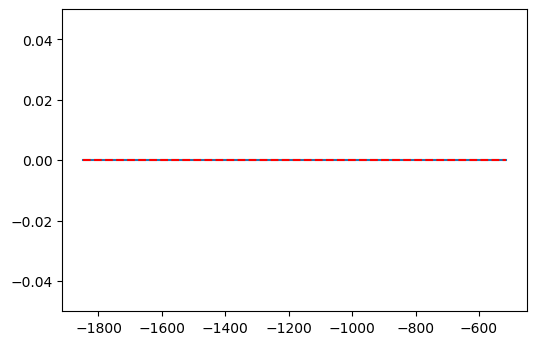

In [18]:
fig=plt.figure(dpi=100)
grad=(y[-1]-y[0])/(x[-1]-x[0])
b=y[0]-grad*x[0]
z=grad*x+b
plt.plot(x[10:99],y[10:99])
plt.plot(x[10:99],z[10:99],'r--')
plt.ylim([min(y[10:99]),max(y[10:99])])
plt.show()

In [25]:
order=2
m=cal.M_p[order]
L_s=cal.L_init[order]
ST=float(values[order+1][-1])
L_s=cal.L_init[order]
te.con.set_M_p(m,8e+6)
te.cal_ML_simple_B(ST,L_s,True,0.0,-1e+3)

(4.9999998538336, 0.011847424209150744, 312175502.2792291)

In [13]:
f=open('test_data.csv','w')
f.write('P,T,M,G,L\n')
for i in range(len(te.values)):
    f.write('{0},{1},{2},{3},{4}\n'.format(te.values[i][0],te.values[i][1],te.values[i][2],te.values[i][3],te.values[i][4]))
f.write('\n\ndP,dT,dM,dG,ddG,dL\n')
for i in range(len(te.dValues)):
    f.write('{0},{1},{2},{3},{4},{5}\n'.format(te.dValues[i][0],te.dValues[i][1],te.dValues[i][2],te.dValues[i][3],te.dValues[i][4],te.dValues[i][5]))
f.close()

In [15]:
for i in values:
    print(i[-2])

M_v=8.0e+06
-0.00024238443848700886
-5.6862371207222484e-05
2.4606326839955207e-05
9.430240593302774e-05
-6.276415322060969e-05
1.1531721548236479e-05
-8.271443394913813e-05
7.7374859584652e-05
-5.524156271499497e-05
-3.284927378783154e-05
5.448593043073935e-05
1.1315228568009594e-05
-6.402972904645532e-05
-1.8582431413641416e-05
7.035190176276664e-05
-1.8599357819043712e-05
-5.196096866974038e-05
8.043778231599068e-06
2.427966941979812e-05
-1.2054915546106434e-05
-3.271590425709412e-05
-2.277681508331157e-05
9.808854259740155e-05
-5.201773871472016e-05
2.7825915774824447e-05
7.289793468481017e-05
6.753507988326826e-05
-1.6295097209814138e-05
-8.384289027886526e-05
8.184147238381753e-05
1.432006812431886e-05
3.83393875152557e-05
-9.344729697417049e-05
9.953003750821313e-05
-7.860932532294685e-05
8.49520341956126e-05
-8.703723228808491e-05
6.980266805610294e-05
-6.250100557167286e-05
-7.892584676664864e-05
2.4366251971522047e-05
6.530660214105935e-05
5.3938793477751506e-05
-1.7489427110

In [27]:
ST

0.0010930168438121148